#**Анализ продаж книг, выявление влияющих факторов (поиск инсайтов, составление рекомендаций стейкхолдерам)**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Загрузка файла и обработка данных

In [ ]:
book = pd.read_csv('Books_Data_Clean.csv')
book

NameError: name 'pd' is not defined

In [ ]:
#необходимо переименовать столбцы
book = book.rename(columns={'index': 'Index', 'Publishing Year': 'Publishing_Year', 'Book Name': 'Book_Name', 'language_code': 'Language_Code', 'Book_average_rating': 'Book_Average_Rating', 'Book_ratings_count': 'Book_Ratings_Count', 'genre': 'Genre', 'gross sales': 'Gross_Sales', 'publisher revenue': 'Publisher_Revenue', 'sale price': 'Sale_Price', 'units sold':'Units_Sold' })

In [ ]:
book.info() #получение сведений о датасете


Index	- Цифровой номер книги

Publishing Year	-     Год публикации книги

Book Name	-           Название книги

Author	-             Автор книги

language_code	-       Код, обозначающий язык, на котором написана книга

Author_Rating	-       Рейтинг, присвоенный автору на основе его предыдущих работ

Book_average_rating	- Средняя оценка, данная книге читателями

Book_ratings_count	- Количество оценок, данных книге читателями

genre	- Жанр или категория, к которой относится книга

gross sales	- Общий объем продаж

publisher revenue	- Доход, полученный издателями от продажи каждой книги

sale price	- Цена, по которой продается каждый экземпляр книги

sales rank	- Рейтинг продажи книги

Publisher - 	Название издательства

units sold	- Общее количество проданных экземпляров


In [ ]:
print(book.isna().sum()) #найдем пустые значения
# процент пропущенных значений
Publishing_Year_isna = (book['Publishing_Year'].isna().sum()/len(book['Publishing_Year'])*100)
Book_Name_isna = round(book['Book_Name'].isna().sum()/len(book['Book_Name'])*100)
Language_Code_isna = round(book['Language_Code'].isna().sum()/len(book['Language_Code'])*100)

print('Пустые значения в Publishing_Year -', Publishing_Year_isna,'%', '\n','Пустые значения в Book_Name - ', Book_Name_isna, '%', '\n','Пустые значения в Language_Code ', Language_Code_isna,'%',)

duplicated_number=book.duplicated().sum() #найдем дубликаты
print('Количество дубликатов: ', duplicated_number)

Пустые значения есть в столбцах: Publishing_Year, Book_Name, Languaue_Code

In [ ]:
duplicated_number=book.duplicated().sum() #найдем дубликаты
print(duplicated_number)

Дубликатов нет

In [ ]:
#Удалим пустую строку с столбце года публикации и  пропущенные значения в Book_name  не представляется возможным восстановать или заменить, поэтому необходимо удалить
book = book.dropna(subset=['Publishing_Year'])
book_df = book.dropna(subset=['Book_Name'])

#преобразуем тип столбца из float  в int и #округлим значения в столбцах
book['Publishing_Year'] = book['Publishing_Year'].astype(int)

book[['Gross_Sales','Publisher_Revenue']] = book[['Gross_Sales','Publisher_Revenue']].round(1)


# создадим датасет с пропусками в столбце Language_Code
book_nan_lg= book_df[book_df['Language_Code'].isnull() == True ]
book_nan_lg.head()

In [ ]:
#найдем уникальные значения в Language_Code
unique_count_lg = book_df['Language_Code'].unique()
unique_count_lg

In [ ]:
#найдем количество книг, написанных на каждом из языков
frequency_lg = book_df['Language_Code'].value_counts()
frequency_lg

In [ ]:
#заменим пустые значения в Language_Code модой
book_data_clean = book_df.copy()
book_data_clean['Language_Code'] = book_data_clean['Language_Code'].fillna(book_df['Language_Code'].mode()[0])

book_data_clean['Language_Code'].value_counts()

В основном книги написаны на английском языке

In [ ]:
print(book_data_clean.isna().sum()) #найдем пустые значения


Пустых значений и дубликатов в наборе данных нет

In [ ]:
#Посмотрим основные статистические характеристики числовых переменных
book_data_clean.describe()

отрицательные значения в столбце Publishing_Year являются аномальными. Их необходимо удалить


In [ ]:
#найдем отрицательные значения в столбце Publishing_Year
a_yaer = book_data_clean[book_data_clean['Publishing_Year'] < 0 ]
a_yaer

In [ ]:
#удалим отрицательные значения
new_df = book_data_clean.drop(book_data_clean[book_data_clean['Publishing_Year'] < 0].index)

In [ ]:
#найдем частоту каждого рейтинга в столбце Author_Rating

frequency_author_Rating = new_df['Author_Rating'].value_counts()
frequency_author_Rating


In [ ]:
#найдем частоту каждого рейтинга в столбце Genre

frequency_author_genre = new_df['Genre'].value_counts()
frequency_author_genre

In [ ]:
#genre fiction	и fiction являются дубликатами. необходимо изменить название
new_df['Genre'] = new_df['Genre'].replace('genre fiction', 'fiction')


In [ ]:
frequency_author_publisher = new_df['Publisher '].value_counts()
frequency_author_publisher

In [ ]:
#HarperCollins Publishers	 и HarperCollins Publishing	 являются одинаковыми
new_df['Publisher '] = new_df['Publisher '].replace('HarperCollins Publishing', 'HarperCollins Publishers')

In [ ]:
#посмтрим сколько уникальных значений в категориальных жанных- unique; top значений; частоту появления значений - freg.
new_df.describe(include = 'object')

# Распределение числовых переменных

Text(0, 0.5, 'Количество')

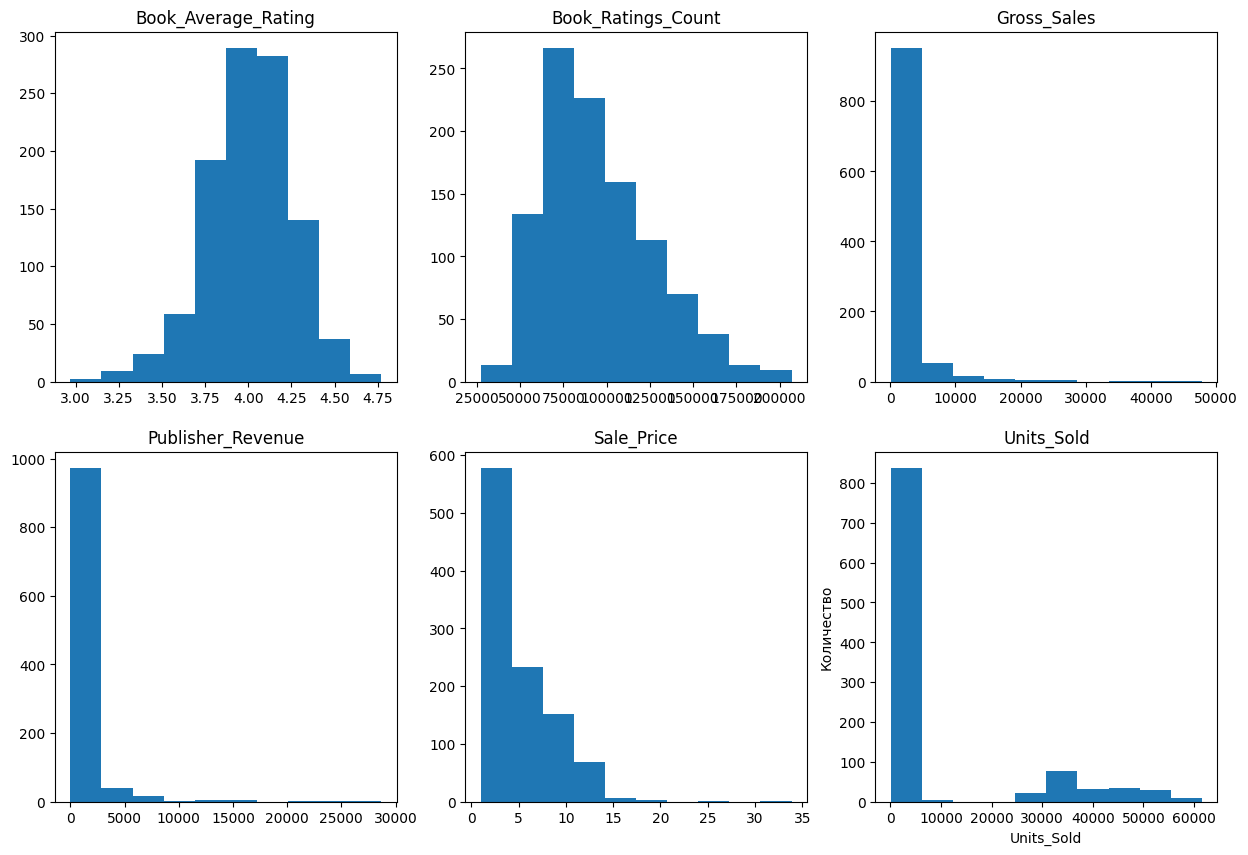

In [ ]:
fig, axis = plt.subplots(2, 3, figsize = (15,10))

axis[0,0].hist(x = new_df["Book_Average_Rating"])
axis[0,0].set_title("Book_Average_Rating")
plt.xlabel('Book_Average_Rating')
plt.ylabel('Количество')

axis[0,1].hist(x = new_df["Book_Ratings_Count"])
axis[0,1].set_title("Book_Ratings_Count")
plt.xlabel('Book_Ratings_Count')
plt.ylabel('Количество')

axis[0,2].hist(x = new_df["Gross_Sales"])
axis[0,2].set_title("Gross_Sales")
plt.xlabel('Gross_Sales')
plt.ylabel('Количество')

axis[1,0].hist(x = new_df["Publisher_Revenue"])
axis[1,0].set_title("Publisher_Revenue")
plt.xlabel('Publisher_Revenue')
plt.ylabel('Количество')

axis[1,1].hist(x = new_df["Sale_Price"])
axis[1,1].set_title("Sale_Price")
plt.xlabel('Sale_Price')
plt.ylabel('Количество')


axis[1,2].hist(x = new_df["Units_Sold"])
axis[1,2].set_title("Units_Sold")
plt.xlabel('Units_Sold')
plt.ylabel('Количество')

Рейтинг книги 4.0 имеет самую высокую частоту. Это означает, что многие книги получили оценку 4 от читателей.

Количество оценок книг сильно варьируется: в среднем 94 987 и выше. максимум - 206 792. Набор данных включает книги с как минимум 27 308 оценками.

Валовые продажи демонстрируют значительную изменчивость, распределяясь неравномерно, варьируясь от 104.9 до 47795. Основная часть до 10000.

Выручка издательства также демонстрирует значительную изменчивость: в среднем она составляет 833,91, а в максимальном - 28 677. Некоторые книги не приносили издателю дохода, о чем свидетельствует минимальное значение, равное 0

Цены продажи варьируются от 0,99 до 33,86 при средней цене 4,84. Межквартильный диапазон (от 25% до 75%) составляет от 1,99 до 6,99.

Продано единиц Количество проданных единиц колеблется от 106 до 61 560, в среднем 9799,22. Существует значительный разброс с высоким стандартным отклонением в 15 488,77

#Рассмотрим категориальные переменные

<ipython-input-26-8fa8e3a1e074>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=counts.index, y=counts, palette='cividis')
<ipython-input-26-8fa8e3a1e074>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=author_rating_counts.index, y=author_rating_counts, palette='cividis')
<ipython-input-26-8fa8e3a1e074>:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=genre_counts.index, y=genre_counts, palette='cividis')
<ipython-input-26-8fa8e3a1e074>:26: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will

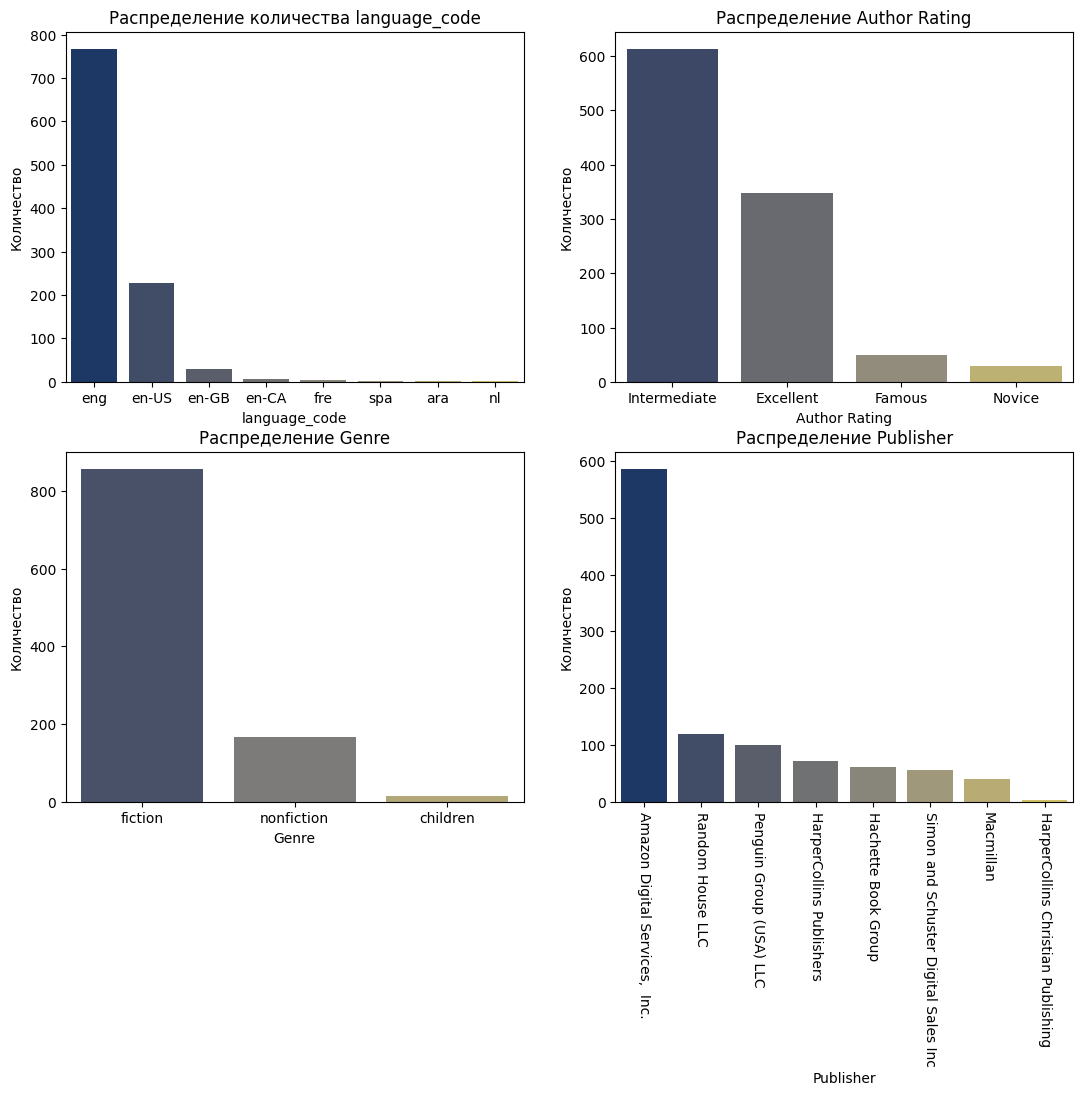

In [ ]:
plt.figure(figsize=(13, 10))
plt.subplot(2, 2, 1)
counts = new_df['Language_Code'].value_counts()
sns.barplot(x=counts.index, y=counts, palette='cividis')
plt.xlabel('language_code')
plt.ylabel('Количество')
plt.title('Распределение количества language_code')

plt.subplot(2, 2, 2)
author_rating_counts = new_df['Author_Rating'].value_counts()
ax = sns.barplot(x=author_rating_counts.index, y=author_rating_counts, palette='cividis')
plt.xlabel("Author Rating")
plt.ylabel("Количество")
plt.title("Распределение Author Rating")


plt.subplot(2, 2, 3)
genre_counts = new_df['Genre'].value_counts()
ax = sns.barplot(x=genre_counts.index, y=genre_counts, palette='cividis')
plt.xlabel("Genre")
plt.ylabel("Количество")
plt.title("Распределение Genre")

plt.subplot(2, 2, 4)
publisher_counts = new_df['Publisher '].value_counts()
ax = sns.barplot(x=publisher_counts.index, y=publisher_counts, palette='cividis')
plt.xticks(rotation=-90)
plt.xlabel("Publisher")
plt.ylabel("Количество")
plt.title("Распределение Publisher")
plt.show()


Основное количество книг написано на английском языке (eng)

В распределении рейтинга автора часто встречается средний рейтинг

Предпочтение в жанрах - фантастика

Большинсnво книг от издательства Amazon Digital

# Publishing_Year

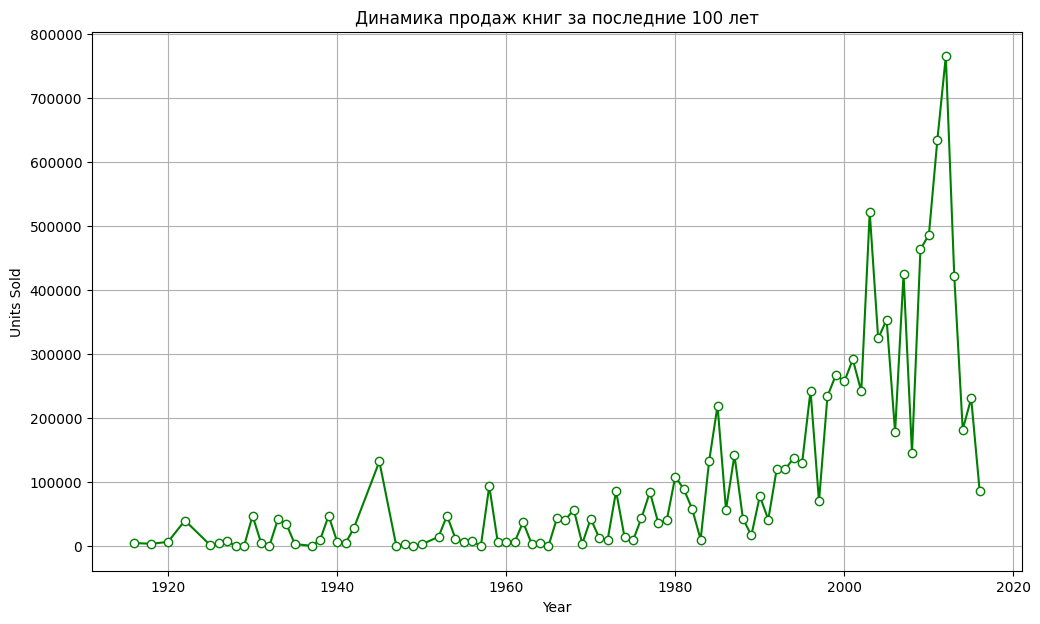

In [ ]:
# Посмотрим динамику проданных книг за последние 100 лет
books_100_years = new_df[new_df['Publishing_Year'] >= (new_df['Publishing_Year'].max() - 100)]

plt.figure(figsize=(12, 7))
books_100_years.groupby('Publishing_Year')['Units_Sold'].sum().plot(marker='o', color='green', markerfacecolor='white')
plt.xlabel('Year')
plt.ylabel('Units Sold')
plt.title('Динамика продаж книг за последние 100 лет')
plt.grid(True)
plt.show()

По графику виден рост проданных книг из года в год. После 2000 года рост проданных книг. В 2012 году был пик продаж, однако после 2012 года произошел резкий спад.Эта тенденция свидетельствует о значительных изменениях в предпочтениях покупателей или внешних факторах, влияющих на книгоиздательскую индустрию.

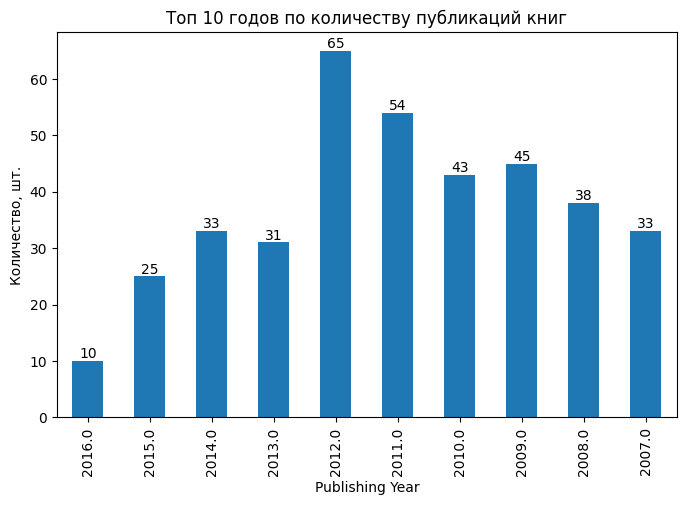

In [ ]:
#посмотрим топ 10 годов по количеству книг
plt.figure(figsize=(8,5))
plt.title('Топ 10 годов по количеству публикаций книг')
book2 = new_df['Publishing_Year'].value_counts().sort_index(ascending=False).head(10).plot(kind='bar')
plt.xlabel('Publishing Year')
plt.ylabel('Количество, шт.')
for p in book2.containers:
 book2.bar_label(p)
plt.show()

Похоже, что количество книжных изданий, достигшее своего наивысшего уровня в 2012 году, является самым высоким за последние двадцать лет. За последние четыре года количество книжных изданий значительно сократилось.

Необходим дальнейший анализ, чтобы понять первопричины резкого снижения продаж книг и его последствия для книжного рынка в целом.

In [ ]:
books_50_years = new_df[new_df['Publishing_Year'] >= (new_df['Publishing_Year'].max() - 50)]

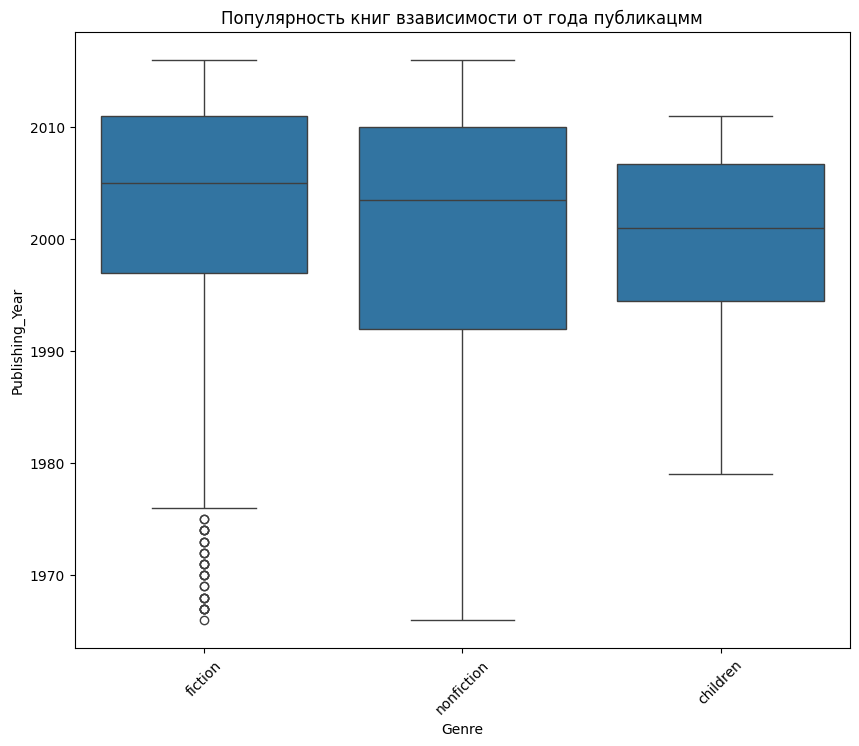

In [ ]:
plt.figure(figsize=(10, 8))
sns.boxplot(x='Genre', y='Publishing_Year', data=books_50_years)
plt.xticks(rotation=45)
plt.xlabel('Genre')
plt.ylabel('Publishing_Year')
plt.title('Популярность книг взависимости от года публикацмм')
plt.show()

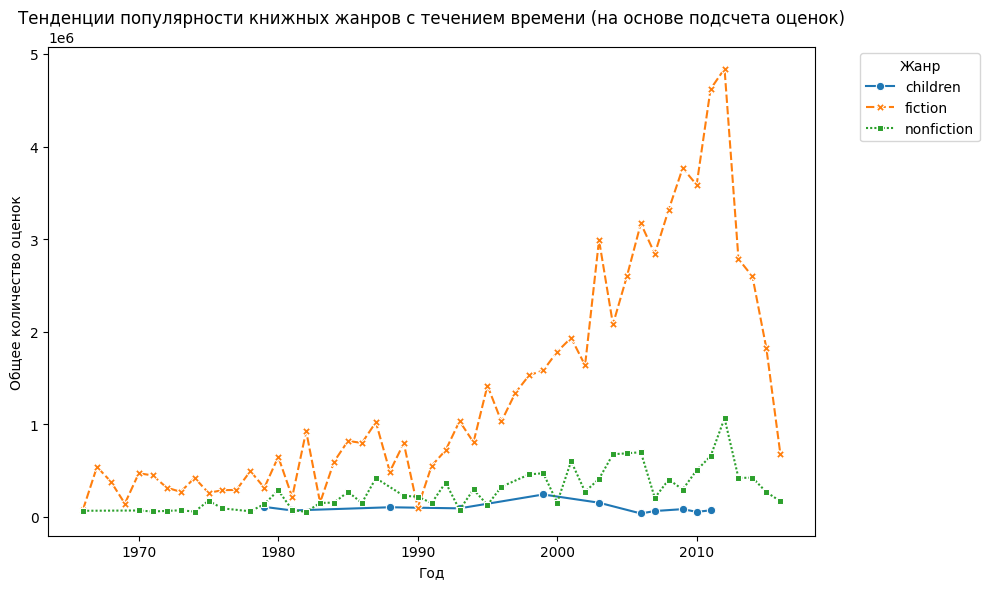

In [ ]:
#Группировка по годам и жанрам, суммирование количества рейтингов
genre_trends = books_50_years.groupby(['Publishing_Year', 'Genre']).agg({'Book_Ratings_Count': 'sum'}).reset_index()

genre_trends_pivot = genre_trends.pivot(index='Publishing_Year', columns='Genre', values='Book_Ratings_Count')


plt.figure(figsize=(10, 6))
sns.lineplot(data=genre_trends_pivot, markers=True)
plt.title('Тенденции популярности книжных жанров с течением времени (на основе подсчета оценок)')
plt.xlabel('Год')
plt.ylabel('Общее количество оценок')
plt.legend(title='Жанр', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

Художественная литература является самой популярной категорией. Тесно совпадают направления художественной и научно-популярной литературы в целом, несмотря на огромную разницу в их количестве.

Наконец, мы можем ясно видеть, что детские книги, как правило, пользуются гораздо меньшей популярностью, хотя, возможно, причина только в том, что в нашем наборе данных недостаточно детских книг.

# Genre

Text(0.5, 1.0, 'Проданные книги относительно рейтинга автора и жанра')

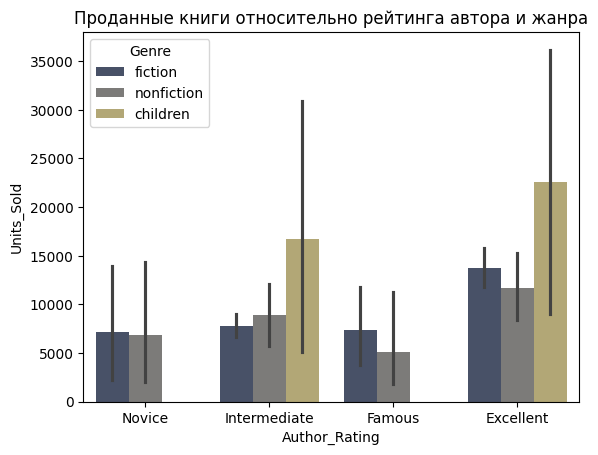

In [ ]:
#посмотрим влияние на продажи. гипотеза: Возможно , книги определенных жанров продаются лучше ,чем другие
sns.barplot(x="Author_Rating", y="Units_Sold", hue="Genre", data=new_df, palette='cividis');
plt.title("Проданные книги относительно рейтинга автора и жанра")

Книги Excellent  и Intermediate авторов покупают чаще.
Уровень проданных книг у Novice-авторов и Famous на одном уровне, детский жанр у этих авторов отсутствует.

Книги из жанра "children" авторов рейтинга Intermediate и Excellent продаются в большем количестве

<ipython-input-33-219680fd8901>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data =new_df,x = 'Sale_Price',y ="Genre", palette='cividis')


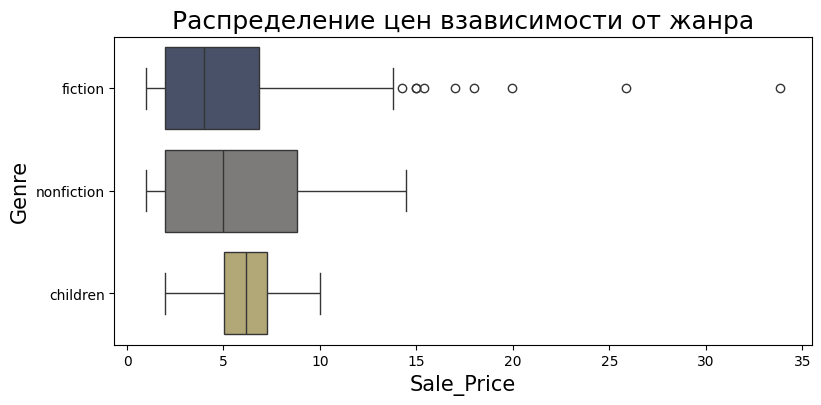

In [ ]:
plt.figure(figsize = (9,4))
sns.boxplot(data =new_df,x = 'Sale_Price',y ="Genre", palette='cividis')
plt.title("Распределение цен взависимости от жанра", fontsize = 18)
plt.ylabel("Genre", fontsize = 15)
plt.xlabel("Sale_Price",fontsize = 15)
plt.show()

В фантастическом жанре (fiction) есть выбросы по цене продажи.

Жанр nonfiction имеет среднюю цену и стоимость книг выше, чем другие жанры.

В жанре children детскойлитературы средняя стоимость книги превышает другие жанры.

# Book_Average_Rating

In [ ]:
#гипотеза. Можно предположить, что книги популярных авторов имеют более высокий средний рейтинг
new_df.groupby('Author_Rating')['Book_Average_Rating'].mean()


,Book_Average_Rating
Author_Rating,
Excellent,4.165460
Famous,4.438980
Intermediate,3.907443
Novice,3.369000


Книги авторов с рейтингом Excellent и Famous имеют более высокий рейтинг

Text(0.5, 1.0, 'Отношение Autor_rating и Book_average_rating к объёму продаж')

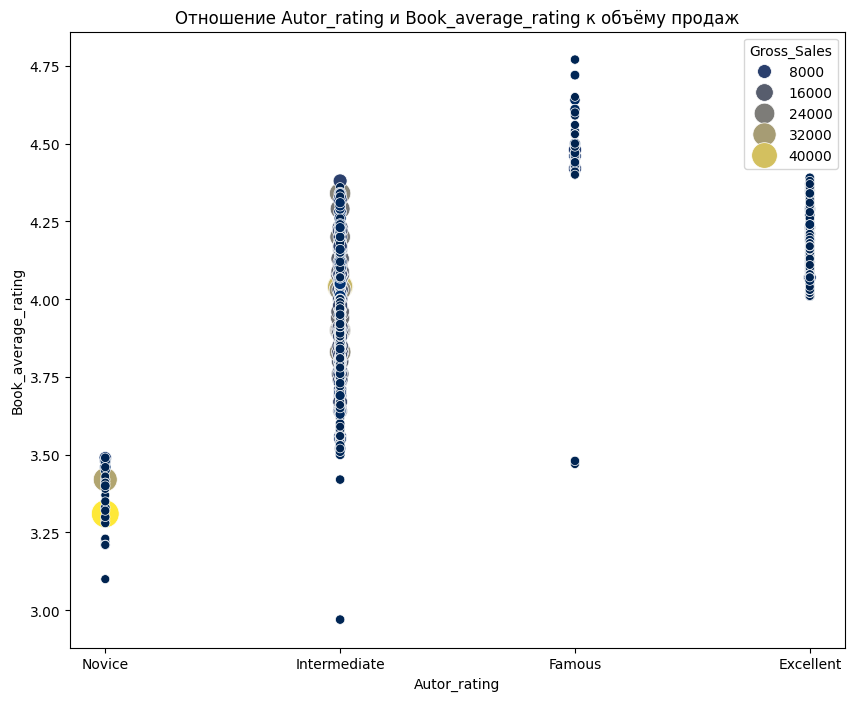

In [ ]:
plt.figure(figsize=(10, 8))
sns.scatterplot(x="Author_Rating", y="Book_Average_Rating", hue = "Gross_Sales", size="Gross_Sales", sizes=(40, 400),palette='cividis', data=new_df)
plt.xlabel('Autor_rating')
plt.ylabel('Book_average_rating')
plt.title('Отношение Autor_rating и Book_average_rating к объёму продаж')

Книги начинающих авторов стоят дороже остальных
В то время как книги известных авторов самые дешевые

<ipython-input-36-ffd3078e1ca3>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  a= sns.barplot(x='RatingRange', y='Publisher_Revenue', data=new_df, palette='cividis')


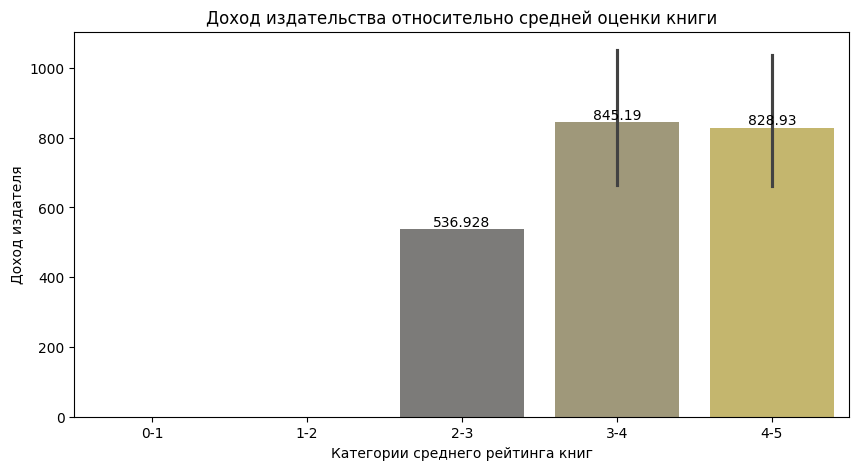

In [ ]:
#гипотеза: книги с наиболее высоким рейтингом приносят больше прибыли издательству
new_df['RatingRange'] = pd.cut(new_df['Book_Average_Rating'], bins=[0, 1, 2, 3, 4, 5], labels=['0-1', '1-2', '2-3', '3-4', '4-5'])

plt.figure(figsize=(10, 5))
a= sns.barplot(x='RatingRange', y='Publisher_Revenue', data=new_df, palette='cividis')
plt.xlabel("Категории среднего рейтинга книг")
plt.ylabel("Доход издателя")
plt.title("Доход издательства относительно средней оценки книги")
for p in a.containers:
 a.bar_label(p)
plt.show()
plt.show()

Доход издательства увеличивается при продажи книг со средними категориями оценок 3-4 и 4-5

<ipython-input-37-5fa75ccb552c>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='RatingRange', y='Units_Sold', data=new_df, palette='cividis')


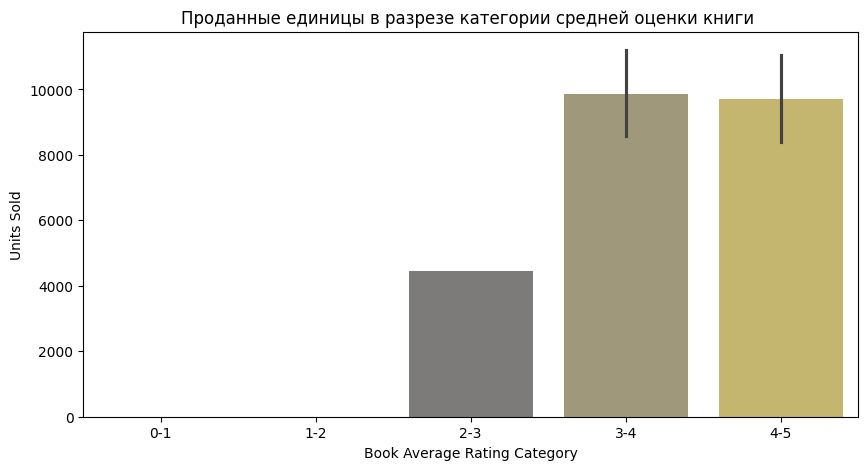

In [ ]:
new_df['RatingRange'] = pd.cut(new_df['Book_Average_Rating'], bins=[0, 1, 2, 3, 4, 5], labels=['0-1', '1-2', '2-3', '3-4', '4-5'])

plt.figure(figsize=(10, 5))
sns.barplot(x='RatingRange', y='Units_Sold', data=new_df, palette='cividis')
plt.xlabel("Book Average Rating Category")
plt.ylabel("Units Sold")
plt.title("Проданные единицы в разрезе категории средней оценки книги ")
plt.show()

В категории средних оценок книг 3-4 и 4-5 наибольшее число проданных единиц

# Book_Ratings_Count

Коэффициент корреляции: 0.09760597381472534


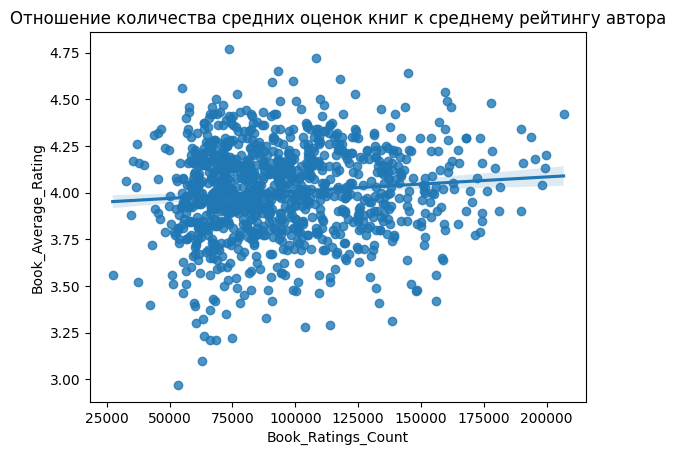

In [ ]:
sns.regplot(data =new_df, x='Book_Ratings_Count', y='Book_Average_Rating')
plt.xlabel('Book_Ratings_Count')
plt.ylabel('Book_Average_Rating')
plt.title('Отношение количества средних оценок книг к среднему рейтингу автора')

# Расчёт коэффициента корреляции
correlation_coefficient = new_df['Book_Ratings_Count'].corr(new_df['Book_Average_Rating'])

# Вывод результата
print("Коэффициент корреляции:", correlation_coefficient)

График показывает, что средний рейтинг возрастает с увеличением количества
оценок.



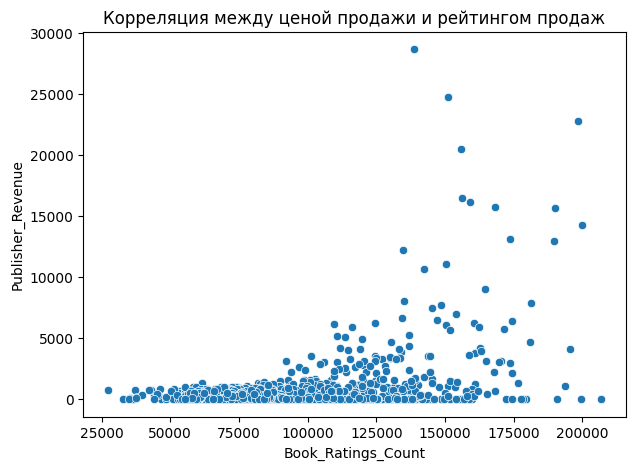

Коэффициент корреляции: 0.39506282132298876


In [ ]:
plt.figure(figsize=(7, 5))
sns.scatterplot(x='Book_Ratings_Count', y='Publisher_Revenue', data=new_df)
plt.xlabel('Book_Ratings_Count')
plt.ylabel('Publisher_Revenue')
plt.title('Корреляция между ценой продажи и рейтингом продаж')
plt.show()

# Расчёт коэффициента корреляции
correlation_coefficient = new_df['Book_Ratings_Count'].corr(new_df['Publisher_Revenue'])

# Вывод результата
print("Коэффициент корреляции:", correlation_coefficient)

Существует слабая прямая линейная зависимость. Большее количество оценок книг (Book_Ratings_Count) в целом связано с увеличением доходов издателя (Publisher_Revenue), но эта связь недостаточно сильна, чтобы делать точные прогнозы на основе этих данных

Коэффициент корреляции: 0.4986562610819696


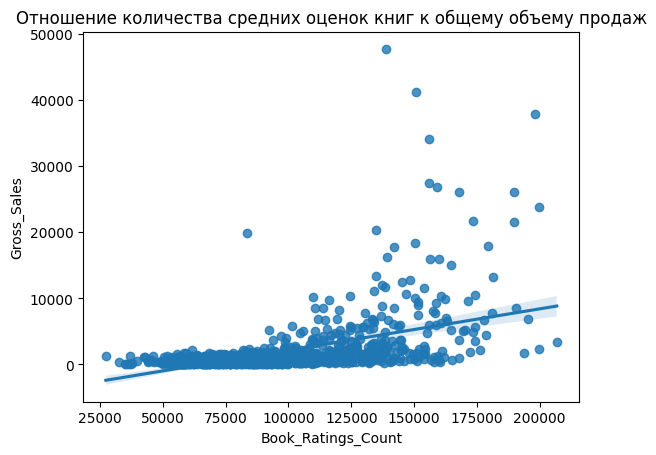

In [ ]:
#влияет ли количество оценок на общий объем продаж
sns.regplot(data =new_df, x='Book_Ratings_Count', y='Gross_Sales')
plt.xlabel('Book_Ratings_Count')
plt.ylabel('Gross_Sales')
plt.title('Отношение количества средних оценок книг к общему объему продаж')

# Расчёт коэффициента корреляции
correlation_coefficient = new_df['Book_Ratings_Count'].corr(new_df['Gross_Sales'])

# Вывод результата
print("Коэффициент корреляции:", correlation_coefficient)

Количество оценок, независимо от того, каков был рейтинг имеет сильную корреляцию с количеством продаж.

Попробуем выяснить, существует ли определенный порог, после которого продажи книг начинают расти. Коэффициент корреляции: 0.49865626624624715


<ipython-input-41-d407541f560a>:7: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_data = new_df.groupby('ratings_count_bins')['Gross_Sales'].mean().reset_index()
<ipython-input-41-d407541f560a>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='ratings_count_bins', y='Gross_Sales', data=grouped_data, palette='cividis')


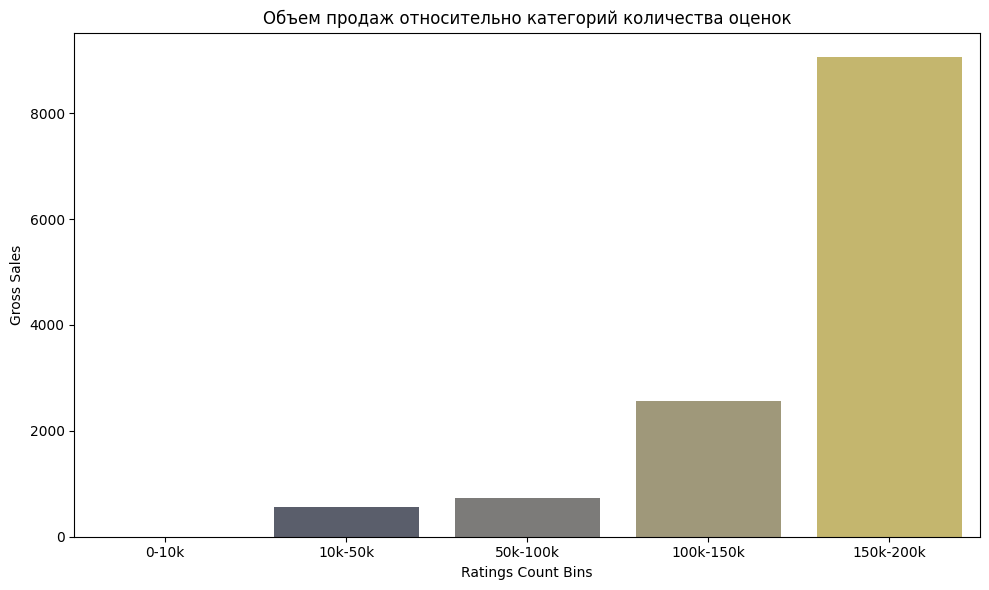

In [ ]:
#Создадим категории для подсчета  ratings_count
bins = [0, 10000, 50000, 100000, 150000, 200000]
labels = ['0-10k', '10k-50k', '50k-100k', '100k-150k', '150k-200k']
new_df['ratings_count_bins'] = pd.cut(new_df['Book_Ratings_Count'], bins=bins, labels=labels)

#Сгруппируем по ячейкам и рассчитаем средний объем валовых продаж на ячейку
grouped_data = new_df.groupby('ratings_count_bins')['Gross_Sales'].mean().reset_index()


plt.figure(figsize=(10, 6))
sns.barplot(x='ratings_count_bins', y='Gross_Sales', data=grouped_data, palette='cividis')


plt.title('Объем продаж относительно категорий количества оценок')
plt.xlabel('Ratings Count Bins')
plt.ylabel('Gross Sales')

plt.tight_layout()
plt.show()

Валовые продажи начинают существенно расти тогда, когда книга наберет более 100 тысяч отзывов. И продажи действительно значительно увеличиваются, когда преодолевается отметка в 150 тысяч.

Эта закономерность говорит о том, что поначалу количество отзывов не играет большой роли в продажах, но после преодоления определенного порога это действительно может повлиять на них.

# Gross_Sales

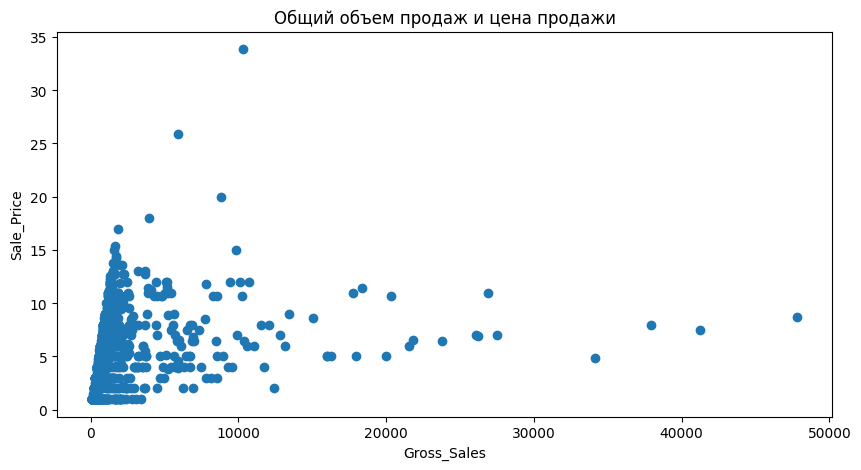

Коэффициент корреляции: 0.27031298308773166


In [ ]:
#гипотеза:общий объём продаж книг зависит от цены продажи.

plt.figure(figsize=(10,5))
plt.scatter(x=new_df["Gross_Sales"],  y=new_df["Sale_Price"])
plt.xlabel("Gross_Sales")
plt.ylabel("Sale_Price")
plt.title("Общий объем продаж и цена продажи")
plt.show()

# Расчёт коэффициента корреляции
correlation_coefficient = new_df['Gross_Sales'].corr(new_df['Sale_Price'])

# Вывод результата
print("Коэффициент корреляции:", correlation_coefficient)

Предполагается, что между общим объёмом продаж и ценой продажи существует слабая положительная корреляция: Это означает, что при увеличении значения одной переменной (например, цены продажи), в среднем значение другой переменной (валовый объём продаж) также имеет тенденцию к увеличению, хотя эта связь не очень сильная.


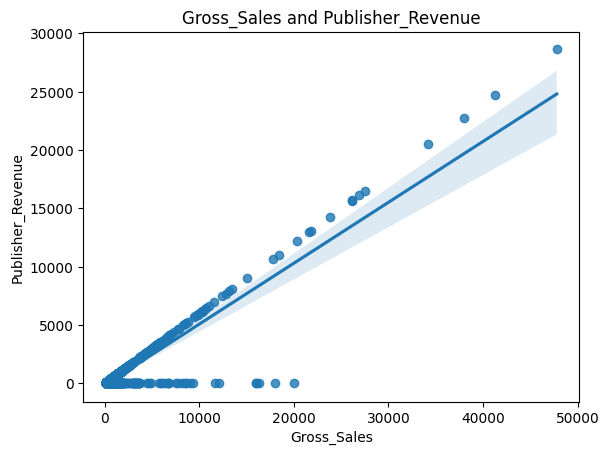

Коэффициент корреляции: 0.9111442819939501


In [ ]:
sns.regplot(data = new_df, x='Gross_Sales', y='Publisher_Revenue')
plt.xlabel("Gross_Sales")
plt.ylabel("Publisher_Revenue")
plt.title("Gross_Sales and Publisher_Revenue")
plt.show()

# Расчёт коэффициента корреляции
correlation_coefficient = new_df['Gross_Sales'].corr(new_df['Publisher_Revenue'])

# Вывод результата
print("Коэффициент корреляции:", correlation_coefficient)

Сильная положительная линейная зависимость между общим валовым объёмом продаж и доходом издательства

Коэффициент корреляции: -0.1500502757048051


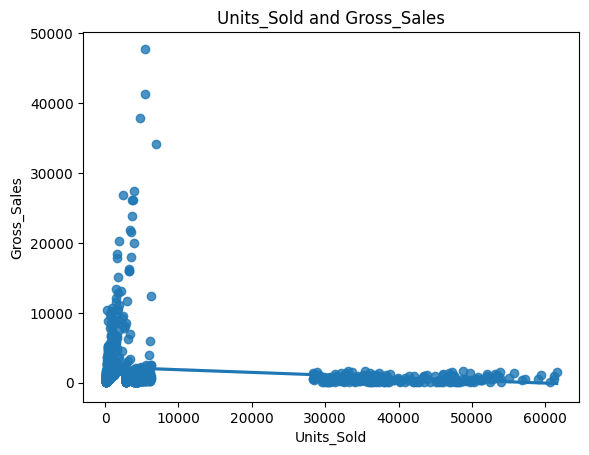

In [ ]:
sns.regplot(data =new_df, x='Units_Sold', y='Gross_Sales')
plt.title("Units_Sold and Gross_Sales")
# Расчёт коэффициента корреляции
correlation_coefficient = new_df['Units_Sold'].corr(new_df['Gross_Sales'])

# Вывод результата
print("Коэффициент корреляции:", correlation_coefficient)

Отсутствует связь. Коэффициент корреляции отрицательный

# Sale_Price

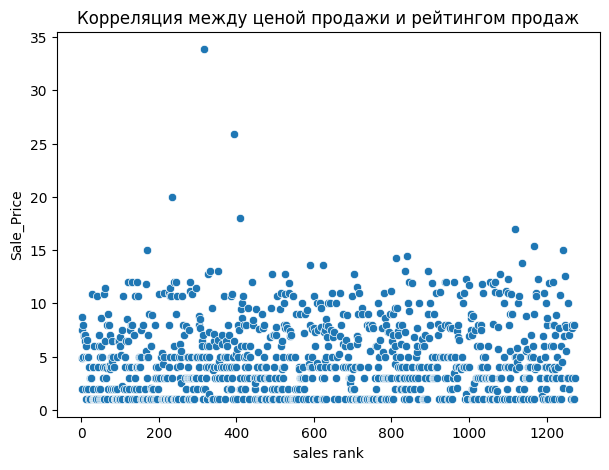

Коэффициент корреляции: 0.07220831132388449


In [ ]:

plt.figure(figsize=(7, 5))
sns.scatterplot(x='sales rank', y='Sale_Price', data=new_df)
plt.xlabel('sales rank')
plt.ylabel('Sale_Price')
plt.title('Корреляция между ценой продажи и рейтингом продаж')
plt.show()
# Расчёт коэффициента корреляции
correlation_coefficient = new_df['sales rank'].corr(new_df['Sale_Price'])

# Вывод результата
print("Коэффициент корреляции:", correlation_coefficient)

Корреляция между ценой продажи и рейтингом продаж, равная 0.072, свидетельствует о слабой положительной связи между этими двумя показателями. Это значит, что существует небольшая тенденция к тому, что более высокая цена связана с более высоким рейтингом продаж. Однако эта связь настолько слаба, что ее трудно считать значимой.

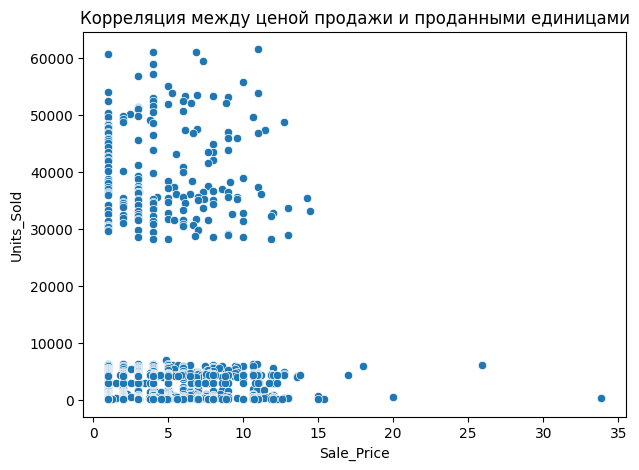

Коэффициент корреляции: 0.00974171890888533


In [ ]:
plt.figure(figsize=(7, 5))
sns.scatterplot(x='Sale_Price', y='Units_Sold', data=new_df)
plt.xlabel('Sale_Price')
plt.ylabel('Units_Sold')
plt.title('Корреляция между ценой продажи и проданными единицами')
plt.show()

# Расчёт коэффициента корреляции
correlation_coefficient = new_df['Sale_Price'].corr(new_df['Units_Sold'])

# Вывод результата
print("Коэффициент корреляции:", correlation_coefficient)

В данном случае корреляция равна 0.00974, что очень близко к нулю. Это означает, что практически отсутствует какая-либо линейная взаимосвязь между ценой продажи и количеством проданных единиц. Иными словами, изменение цены продажи слабо влияет на количество проданных экземпляров книги.



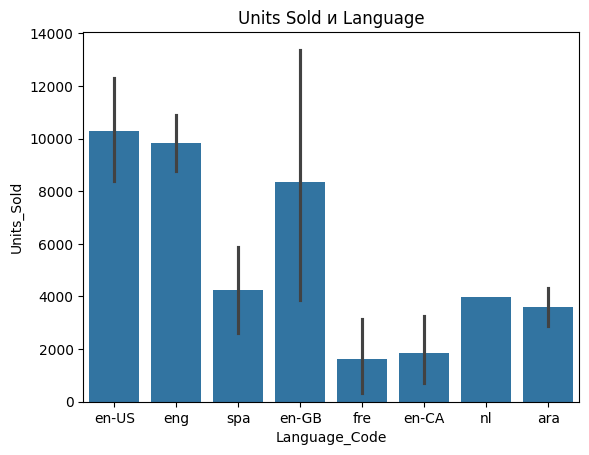

In [ ]:
plt.title('Units Sold и Language')
sns.barplot(data=new_df, x='Language_Code', y='Units_Sold')
plt.show()

Книги на английском языке продаются чаще

# Publisher

<ipython-input-48-194d046c9858>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=max_publisher, x='Publisher_Revenue', y='Publisher ', palette='cividis')


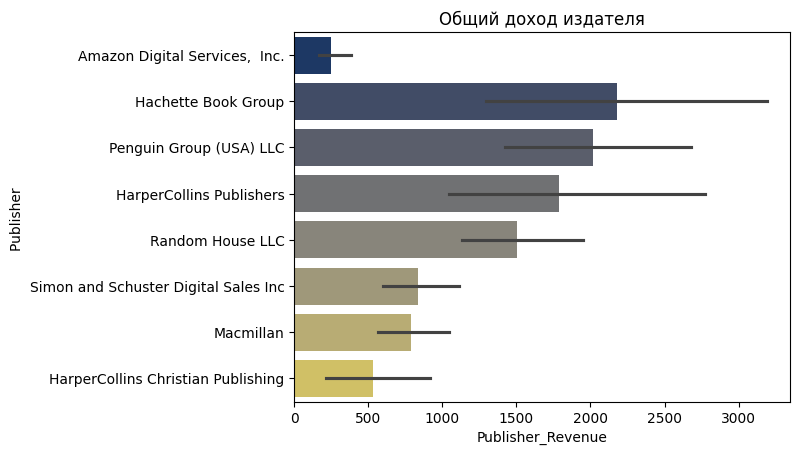

In [ ]:
max_publisher=new_df.sort_values(by='Publisher_Revenue',ascending=False)

plt.title('Общий доход издателя')
sns.barplot(data=max_publisher, x='Publisher_Revenue', y='Publisher ', palette='cividis')

plt.show()


Text(0.5, 1.0, 'Доходы издателя по жанрам')

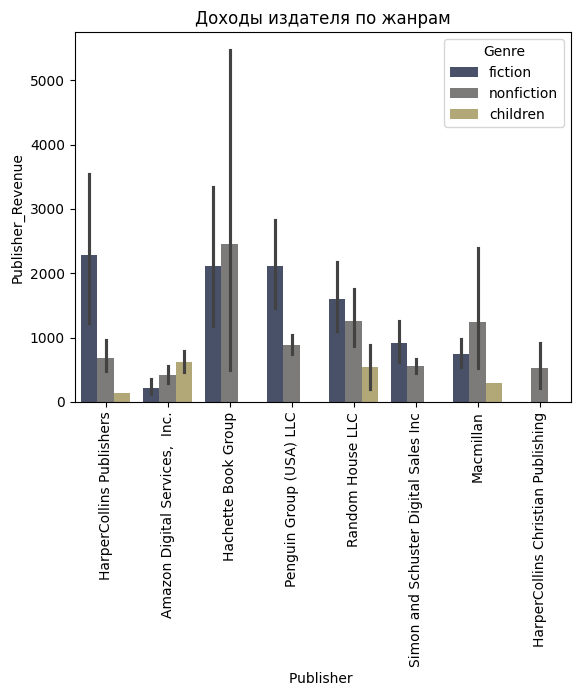

In [ ]:
sns.barplot(x="Publisher ", y="Publisher_Revenue", hue="Genre", data=new_df, palette='cividis')
plt.xticks(rotation=90)
plt.title('Доходы издателя по жанрам')


Издательство Hachette Book Group получило наибольшее количество выручки с жанра документальной литературы и фантастики

In [ ]:
max_publisher_revenue=new_df.sort_values(by='Gross_Sales',ascending=False)


In [ ]:
Top_10_publisher_revenue=max_publisher_revenue[['Author', 'Book_Name','Publisher_Revenue','Book_Average_Rating']].head(10)
Top_10_publisher_revenue

,Author,Book_Name,Publisher_Revenue,Book_Average_Rating
2,Harper Lee,Go Set a Watchman,28677.000,3.31
3,David Sedaris,When You Are Engulfed in Flames,24750.000,4.04
4,Laini Taylor,Daughter of Smoke & Bone,22771.500,4.04
0,"Unknown, Seamus Heaney",Beowulf,20496.000,3.42
6,Charles Duhigg,The Power of Habit,16495.002,4.03
26,Jeffrey Eugenides,The Virgin Suicides,16142.436,3.83
7,John Berendt,Midnight in the Garden of Good and Evil,15709.200,3.90
8,Colleen Hoover,Hopeless,15656.202,4.34
9,"Frances Hodgson Burnett, Nancy Bond",A Little Princess,14275.404,4.20
14,"Margery Williams Bianco, William Nicholson",The Velveteen Rabbit,13078.692,4.29


<ipython-input-52-c76b637e606d>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=Top_10_publisher_revenue, x='Publisher_Revenue', y='Book_Name', palette='cividis')


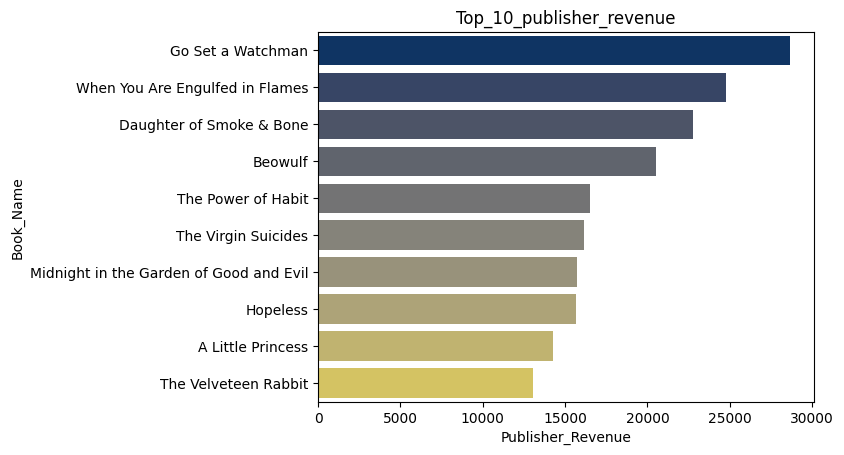

In [ ]:
plt.title('Top_10_publisher_revenue')
sns.barplot(data=Top_10_publisher_revenue, x='Publisher_Revenue', y='Book_Name', palette='cividis')

plt.show()

Книги с наибольшим доходом ранжируются в зависимости от дохода издателя. Первое место занимает "Go Set a Watchman" (28 677,00 единиц), за ним следуют "When You Are Engulfed in Flames" (24 750,00 единиц) и "Daughter of Smoke & Bone" (22 771,50 единиц). Эти результаты показывают, что эти книги пользуются высокой популярностью среди читателей

In [ ]:
#Топ-10 книг с большим количеством продаж
top_10_Units_Sold = new_df.sort_values(by=['Units_Sold'], ascending=False)
top_10_Units_Sold.loc[:, ['Book_Name','Author','Publishing_Year','Sale_Price','Units_Sold','Book_Average_Rating']].reset_index(drop=True).head(10)

,Book_Name,Author,Publishing_Year,Sale_Price,Units_Sold,Book_Average_Rating
0,New Moon: The Complete Illustrated Movie Compa...,Mark Cotta Vaz,2009.0,10.99,61560,4.34
1,Maybe Someday,Colleen Hoover,2014.0,6.83,61128,4.33
2,Mr Maybe,Jane Green,1999.0,3.99,61128,3.41
3,Anne of the Island,L.M. Montgomery,1915.0,0.99,60696,4.21
4,Also sprach Zarathustra,"Friedrich Nietzsche, Walter Kaufmann",1883.0,7.31,59400,4.05
5,North and South,"Elizabeth Gaskell, Alan Shelston",1854.0,3.99,58968,4.13
6,A Stolen Life,Jaycee Dugard,2011.0,3.99,57240,3.89
7,The Immortals of Meluha,Amish Tripathi,2010.0,2.99,56808,4.00
8,The Lost World,Michael Crichton,1995.0,9.99,55728,3.72
9,Requiem,Lauren Oliver,2013.0,4.99,55080,3.74


Существует небольшая отрицательная корреляция как между ценой и количеством оценок, так и между ценой и средним рейтингом. Это может свидетельствовать о том, что бестселлеры не обязательно должны иметь высокую цену, чтобы быть успешными. Как и ожидалось, книги-бестселлеры, как правило, имеют более высокий рейтинг.
Похоже, что большинство самых продаваемых книг продаются по цене до 10 долларов США.

In [ ]:
#Топ-10 книг с большой ценой продаж
top_10_Sale_Price = new_df.sort_values(by=['Sale_Price'], ascending=False)
top_10_Sale_Price.loc[:, ['Book_Name','Author','Publishing_Year','Sale_Price','Units_Sold','Book_Average_Rating']].reset_index(drop=True).head(10)

,Book_Name,Author,Publishing_Year,Sale_Price,Units_Sold,Book_Average_Rating
0,The Wind in the Willows,"Kenneth Grahame, Gillian Avery",1908.0,33.86,305,3.98
1,We Need to Talk About Kevin,Lionel Shriver,2003.0,25.89,6156,4.07
2,Sabriel,Garth Nix,1995.0,19.98,441,4.17
3,The Tenth Circle,Jodi Picoult,2006.0,17.98,5940,3.48
4,Alanna: The First Adventure,Tamora Pierce,1983.0,16.98,4280,4.27
5,Brooklyn,Colm TÃ³ibÃ­n,2009.0,15.37,108,3.63
6,Beautiful Ruins,Jess Walter,2012.0,14.99,655,3.67
7,Et dukkehjem,"Henrik Ibsen, Michael Meyer",1879.0,14.99,106,3.69
8,Leviathan Wakes,James S.A. Corey,2011.0,14.44,33048,4.20
9,What Is the What: The Autobiography of Valenti...,Dave Eggers,2006.0,14.24,35424,4.16


Книги с высокой розничной ценой могут быть менее доступными для широкой аудитории, что влияет на объемы продаж.

In [ ]:
#Топ-10 книг с наибольшей прибылью издательства
top_10_Publisher_Revenue = new_df.sort_values(by=['Publisher_Revenue'], ascending=False)
top_10_Publisher_Revenue.loc[:, ['Book_Name','Author','Publishing_Year','Sale_Price','Units_Sold','Book_Average_Rating','Publisher_Revenue']].reset_index(drop=True).head(10)

,Book_Name,Author,Publishing_Year,Sale_Price,Units_Sold,Book_Average_Rating,Publisher_Revenue
0,Go Set a Watchman,Harper Lee,2015.0,8.69,5500,3.31,28677.000
1,When You Are Engulfed in Flames,David Sedaris,2008.0,7.50,5500,4.04,24750.000
2,Daughter of Smoke & Bone,Laini Taylor,2011.0,7.99,4750,4.04,22771.500
3,Beowulf,"Unknown, Seamus Heaney",1975.0,4.88,7000,3.42,20496.000
4,The Power of Habit,Charles Duhigg,2011.0,6.99,3933,4.03,16495.002
5,The Virgin Suicides,Jeffrey Eugenides,1993.0,10.91,2466,3.83,16142.436
6,Midnight in the Garden of Good and Evil,John Berendt,1994.0,6.89,3800,3.90,15709.200
7,Hopeless,Colleen Hoover,2012.0,6.99,3733,4.34,15656.202
8,A Little Princess,"Frances Hodgson Burnett, Nancy Bond",1905.0,6.49,3666,4.20,14275.404
9,The Velveteen Rabbit,"Margery Williams Bianco, William Nicholson",1922.0,6.54,3333,4.29,13078.692


 Книги, которые приносят высокую прибыль, но не входят в список самых продаваемых, могут иметь низкую себестоимость производства. В этом случае стоит проанализировать причины низкой популярности и рассмотреть возможность корректировки маркетинговой стратегии



In [ ]:
#Кто из авторов написал больше всего книг
top_author_books_count = new_df.groupby(['Author'])['Book_Name'].count().reset_index(name="count")
top_author_books_count.sort_values(['count'], ascending=False).reset_index(drop=True).head(10)

,Author,count
0,Stephen King,29
1,John Grisham,13
2,Jodi Picoult,10
3,Charlaine Harris,10
4,Jim Butcher,10
5,Nicholas Sparks,10
6,Janet Evanovich,9
7,"Lemony Snicket, Brett Helquist",8
8,Michael Crichton,8
9,Terry Pratchett,7


В таблице «Лучшие авторы по количеству бестселлеров» представлены авторы, у которых есть несколько бестселлеров. Анализ тем, стилей письма и маркетинговых стратегий этих лучших авторов может дать ценную информацию начинающим авторам, которые хотят выйти на рынок.

# Матрица корреляции

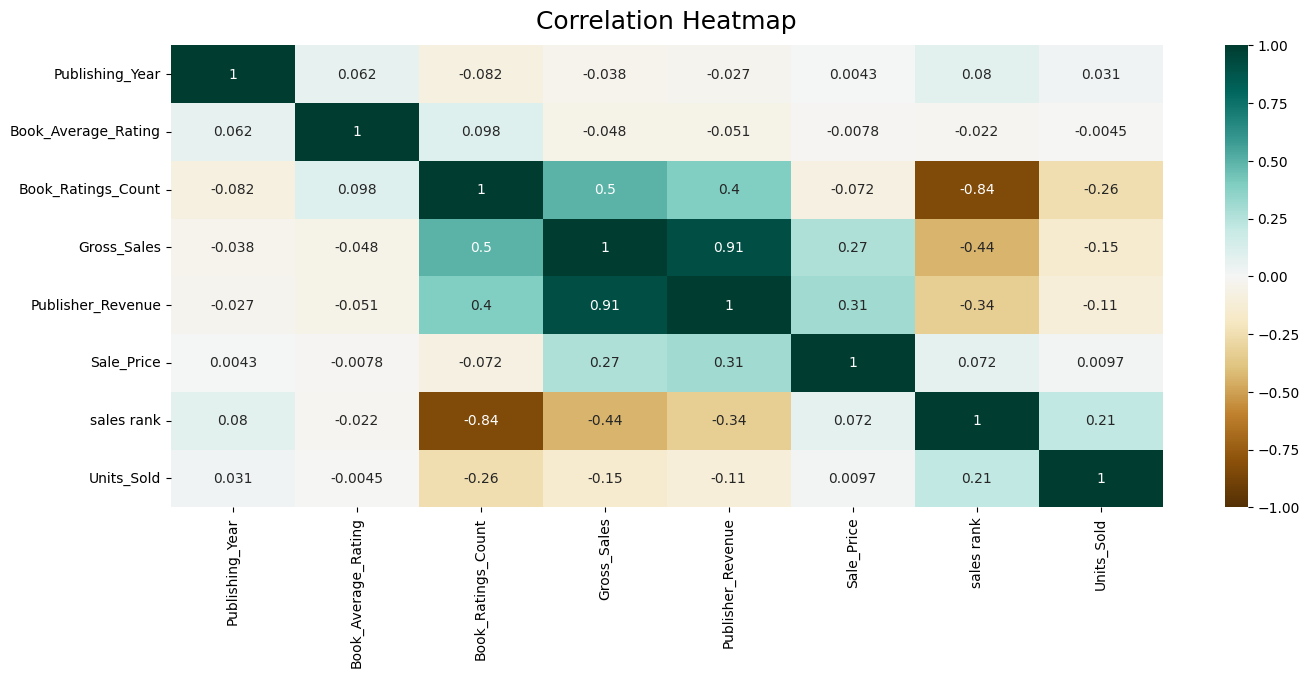

In [ ]:
data = new_df.drop(["Index", "Language_Code", "Book_Name", "Author", "Author_Rating", "Genre",  "Publisher ", "RatingRange", "ratings_count_bins"], axis = 1)
plt.figure(figsize=(16, 6))
heatmap = sns.heatmap(data.corr(), vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':18}, pad=12);

plt.savefig('heatmap.png', dpi=300, bbox_inches='tight')

Gross_Sales коррелирует с Publisher_Revenue (0.91), book_ratings_count (0.5), sale_Price(0.27)

Publisher_Revenue коррелирует с Book_Ratings_Count (0.4),Gross_Sales (0.91), sales_price (0.31)

Units_sold коррелирует с Sales_rank (0.21)

Выводы:

Общий объем продаж книг начал впечатляюще быстро расти в 90-х годах, достигнув своего пика в 2012 году. Затем он начал снижаться.

Похоже, что рейтинг книги несильно влияет на общий объем продаж. Однако количество оценок книг положительно коррелирует. Как только количество оценок на книгу превысит 100 тысяч, продажи книг резко возрастают.

Цена  не коррелирует ни с рейтингами, ни с количеством оценок, а это означает, что она не играет большой роли при покупке книг пользователями.

Самый популярный жанр - художественная литература. Поэтому начинающим авторам следует серьезно подумать о написании художественной литературы.

Книги с рейтингом около 4,0 продаются чаще, и большинство из них принадлежат авторам среднего уровня и отличным авторам.
Детские книги от отличных авторов, как правило, продаются чаще.
У книг начинающих авторов самые высокие продажи, потому что они стоят дороже.
Чем дешевле книга, тем больше она продается.
Книги на английском языке (будь то американские или британские), как правило, продаются дороже.
У Hachette Book Group самый высокий доход по сравнению с другими издательствами.